In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
from dataset import  suny_international

df=suny_international()['ghi']
X=np.array(df.index.minute+df.index.hour*60).reshape(-1,1)
y=np.array(df)

In [31]:
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model

def baseline_model(input_dim):
    regressor = Sequential()
    regressor.add(Dense(units=20, activation='relu', input_dim=input_dim)) 
    regressor.add(Dense(units=20, activation='relu')) 
    regressor.add(Dense(units=20, activation='relu')) 
    regressor.add(Dense(units=1))
    regressor.compile(loss='mean_squared_error', optimizer='adam')
    return regressor

In [ ]:
model_path='models/simple_dnn.h5'
if os.path.isfile(model_path):
    model=load_model(model_path)
else:
    model = baseline_model(1)
    model.fit(X,y,epochs=40)
y_pred = model.predict(X)
model.save(model_path)

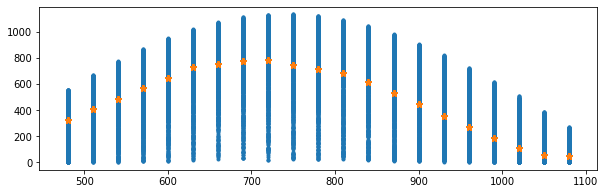

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X.reshape(-1),y,marker='.')
plt.scatter(X.reshape(-1),y_pred,marker='*')
plt.show()

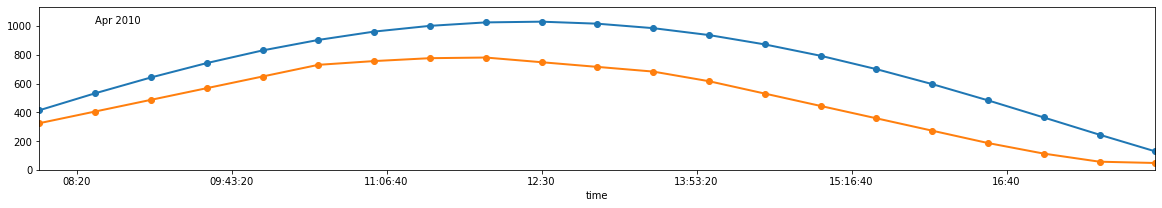

In [30]:
from animate import plot_daily
import pandas as pd 
plot_daily(df,pd.Series(y_pred.ravel(),index=df.index),save='media/simple_dnn.mp4')

In [ ]:
baseline_model(2)